In [1]:
#importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier


from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,f1_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
import joblib
import warnings
warnings.filterwarnings('ignore')

In [5]:
#displating max_rows
pd.set_option('display.max_rows',500,'display.max_columns',None)

In [6]:
#importing dataset
df=pd.read_csv('Avocado.csv')
df.head()

Unnamed: 0        Date  AveragePrice  Total Volume     4046       4225  \
0           0  2015-12-27          1.33      64236.62  1036.74   54454.85   
1           1  2015-12-20          1.35      54876.98   674.28   44638.81   
2           2  2015-12-13          0.93     118220.22   794.70  109149.67   
3           3  2015-12-06          1.08      78992.15  1132.00   71976.41   
4           4  2015-11-29          1.28      51039.60   941.48   43838.39   

     4770  Total Bags  Small Bags  Large Bags  XLarge Bags          type  \
0   48.16     8696.87     8603.62       93.25          0.0  conventional   
1   58.33     9505.56     9408.07       97.49          0.0  conventional   
2  130.50     8145.35     8042.21      103.14          0.0  conventional   
3   72.58     5811.16     5677.40      133.76          0.0  conventional   
4   75.78     6183.95     5986.26      197.69          0.0  conventional   

   year  region  
0  2015  Albany  
1  2015  Albany  
2  2015  Albany  
3  2015  Albany  
4  2015  Albany

# considering the target variable as region ,lets work on Classification problem

In [7]:
df.shape

(18249, 14)

there are 18249 rows and 14 columns in the dataset

we are able to see region,Date,type as categorical data and


In [10]:
df.Date.nunique()

169

In [11]:
df["month"] = pd.to_datetime(df.Date, format="%Y/%m/%d").dt.month

In [12]:
df["Day"] = pd.to_datetime(df.Date, format="%Y/%m/%d").dt.day

we are going to drop 'unnamed' column as it has no relation with the model,and we can drop the column Date now since we splitted the Date column to month and Day and Year column is already present in the dataset as it is unnecessary

In [14]:
#dropping 'unnamed' and 'Date' data from the dataset
df.drop(columns=["Unnamed: 0","Date"],axis=1,inplace=True)

In [15]:
#updated Dataset shape
df.shape

(18249, 14)

we have 14 columns in the dataset now,the number of rows remains unchanged .

In [17]:
df['type'].value_counts()

conventional    9126
organic         9123
Name: type, dtype: int64

In [18]:
df['type'].nunique()

2

In [19]:
df['year'].value_counts()

2017    5722
2016    5616
2015    5615
2018    1296
Name: year, dtype: int64

In [20]:
df['year'].nunique()

4

In [21]:
#lets check for duplicates in the dataset 
df.drop_duplicates(inplace=True)
df.shape

(18249, 14)

here are no duplicates in the dataset

# Missing values

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   AveragePrice  18249 non-null  float64
 1   Total Volume  18249 non-null  float64
 2   4046          18249 non-null  float64
 3   4225          18249 non-null  float64
 4   4770          18249 non-null  float64
 5   Total Bags    18249 non-null  float64
 6   Small Bags    18249 non-null  float64
 7   Large Bags    18249 non-null  float64
 8   XLarge Bags   18249 non-null  float64
 9   type          18249 non-null  object 
 10  year          18249 non-null  int64  
 11  region        18249 non-null  object 
 12  month         18249 non-null  int64  
 13  Day           18249 non-null  int64  
dtypes: float64(9), int64(3), object(2)
memory usage: 2.1+ MB


In [24]:
#checking the availabel null values in the dataset 
df.isnull().sum()

AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
month           0
Day             0
dtype: int64

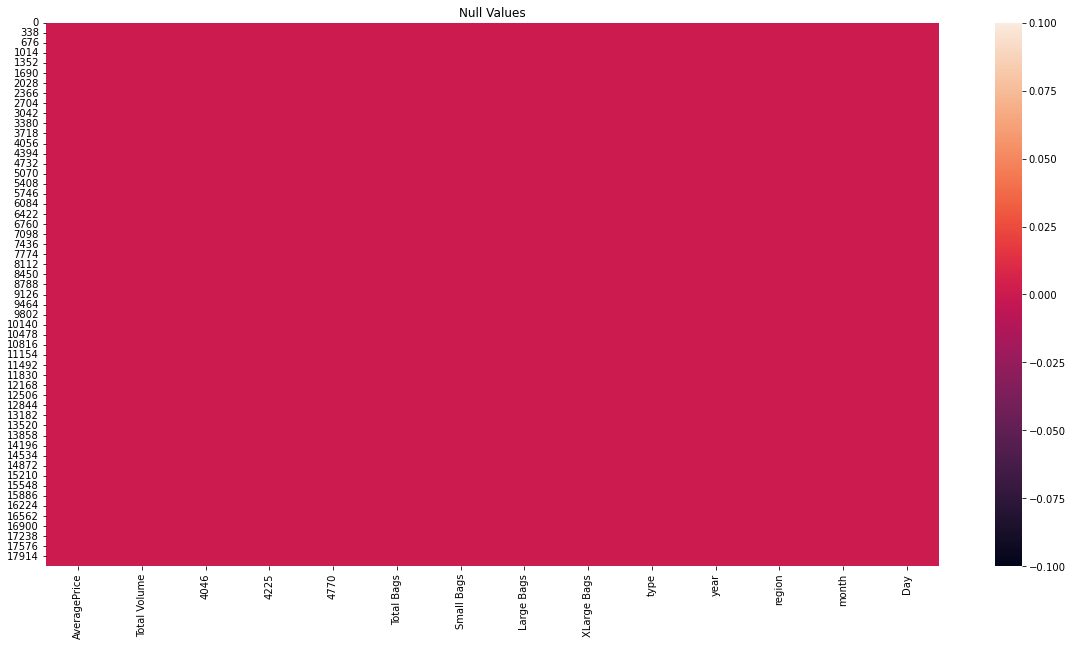

In [25]:
#heatmap on null values
plt.figure(figsize=[20,10])
sns.heatmap(df.isnull())
plt.title("Null Values")
plt.show()

In [26]:
there are no whitespaces or null values present in the dataset so we can continue with the dataset
as we have non null values equal to same no of available rows in the dataset

SyntaxError: invalid syntax (1516938558.py, line 1)

# Statistics summary

In [27]:
df.describe().T

count           mean           std      min       25%  \
AveragePrice  18249.0       1.405978  4.026766e-01     0.44      1.10   
Total Volume  18249.0  850644.013009  3.453545e+06    84.56  10838.58   
4046          18249.0  293008.424531  1.264989e+06     0.00    854.07   
4225          18249.0  295154.568356  1.204120e+06     0.00   3008.78   
4770          18249.0   22839.735993  1.074641e+05     0.00      0.00   
Total Bags    18249.0  239639.202060  9.862424e+05     0.00   5088.64   
Small Bags    18249.0  182194.686696  7.461785e+05     0.00   2849.42   
Large Bags    18249.0   54338.088145  2.439660e+05     0.00    127.47   
XLarge Bags   18249.0    3106.426507  1.769289e+04     0.00      0.00   
year          18249.0    2016.147899  9.399385e-01  2015.00   2015.00   
month         18249.0       6.177215  3.534130e+00     1.00      3.00   
Day           18249.0      15.662612  8.776281e+00     1.00      8.00   

                    50%        75%          max  
AveragePrice       1.37       1.66         3.25  
Total Volume  107376.76  432962.29  62505646.52  
4046            8645.30  111020.20  22743616.17  
4225           29061.02  150206.86  20470572.61  
4770             184.99    6243.42   2546439.11  
Total Bags     39743.83  110783.37  19373134.37  
Small Bags     26362.82   83337.67  13384586.80  
Large Bags      2647.71   22029.25   5719096.61  
XLarge Bags        0.00     132.50    551693.65  
year            2016.00    2017.00      2018.00  
month              6.00       9.00        12.00  
Day               16.00      23.00        31.00

In [28]:
df['region'].nunique()

54

In [29]:
df['region'].value_counts()

Albany                 338
Sacramento             338
Northeast              338
NorthernNewEngland     338
Orlando                338
Philadelphia           338
PhoenixTucson          338
Pittsburgh             338
Plains                 338
Portland               338
RaleighGreensboro      338
RichmondNorfolk        338
Roanoke                338
SanDiego               338
Atlanta                338
SanFrancisco           338
Seattle                338
SouthCarolina          338
SouthCentral           338
Southeast              338
Spokane                338
StLouis                338
Syracuse               338
Tampa                  338
TotalUS                338
West                   338
NewYork                338
NewOrleansMobile       338
Nashville              338
Midsouth               338
BaltimoreWashington    338
Boise                  338
Boston                 338
BuffaloRochester       338
California             338
Charlotte              338
Chicago                338
C

In [30]:
color_list=['green','purple','red','blue','black','Orange','violet','pink','yellow']

Text(0.5, 1.0, 'region')

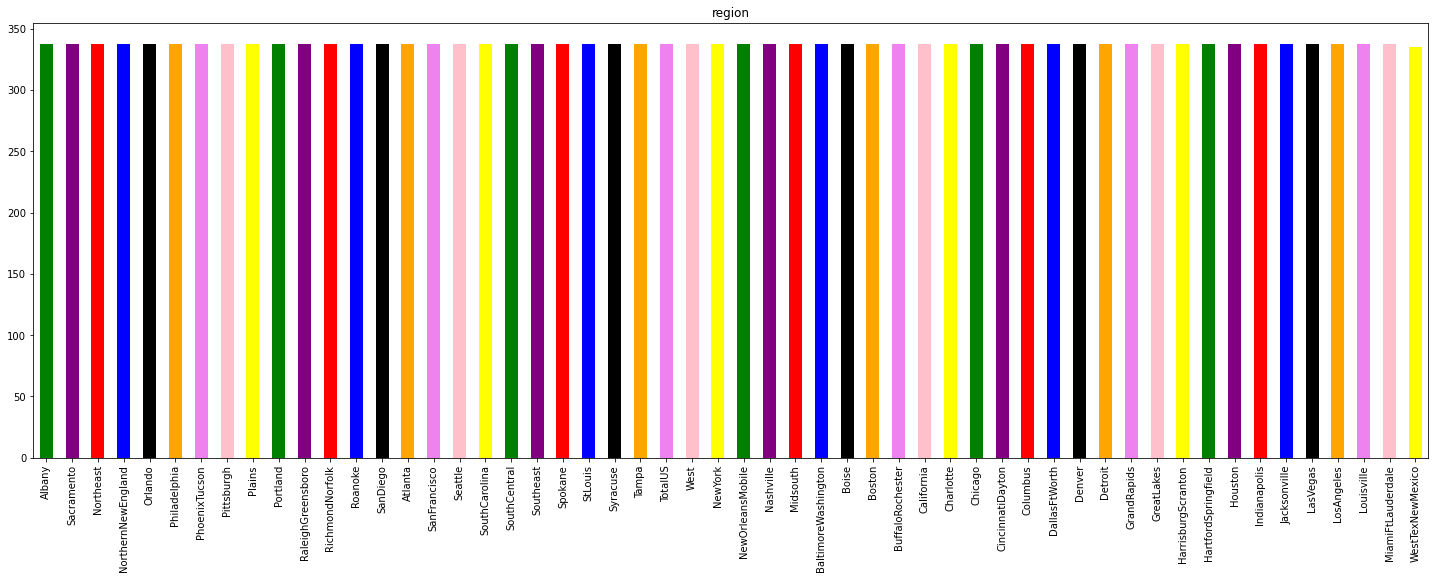

In [31]:
plt.figure(figsize=(25,8))
pd.value_counts(df.region).plot.bar(color=color_list)
plt.title("region")

<AxesSubplot:ylabel='None'>

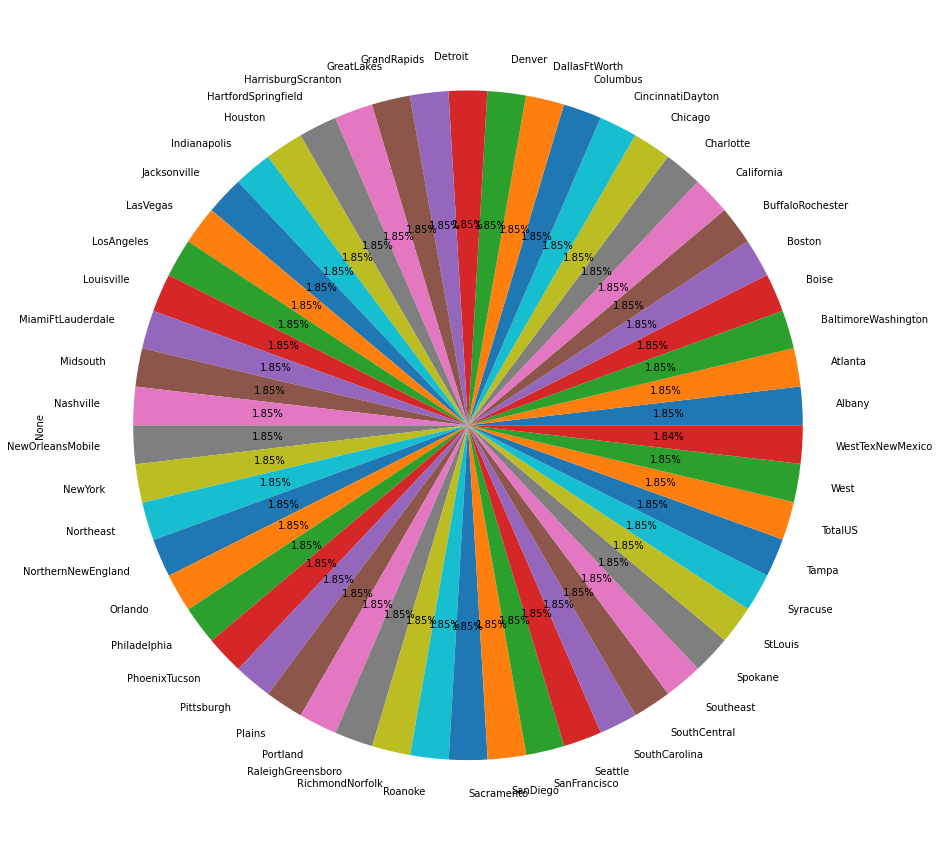

In [32]:
plt.figure(figsize=(15,25))

df.groupby("region").size().plot(kind='pie',autopct='%.2f%%')

<AxesSubplot:>

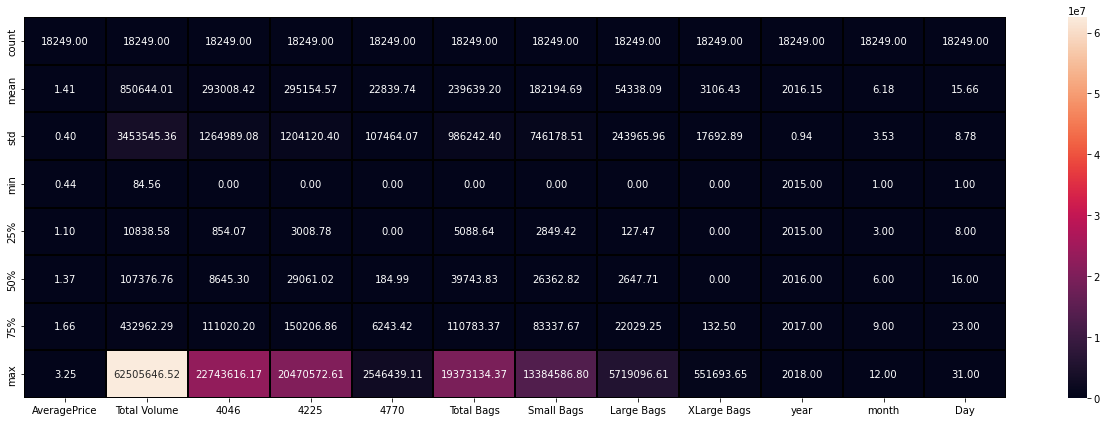

In [33]:
plt.figure(figsize=(22,7))
sns.heatmap(df.describe(),annot=True,linewidths=0.1,linecolor="black",fmt="0.2f")

# Encoding

In [34]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()

In [35]:
df.type=LE.fit_transform(df.type)

In [36]:
df.region=LE.fit_transform(df.region)

# Data Visualization

In [37]:
columns=df.columns

In [91]:
def hist_plt(i):
    plt.figure(figsize=(10,5))
    
    sns.histplot(x=columns[i],data=df,kde=True)

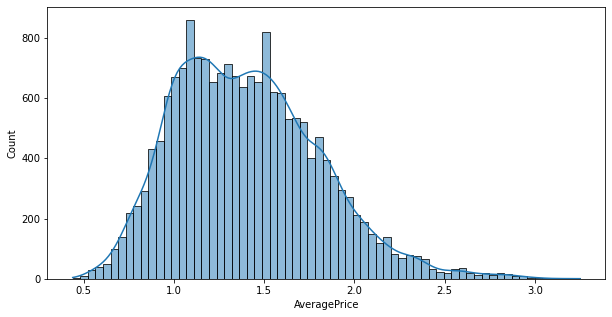

In [92]:
hist_plt(0)

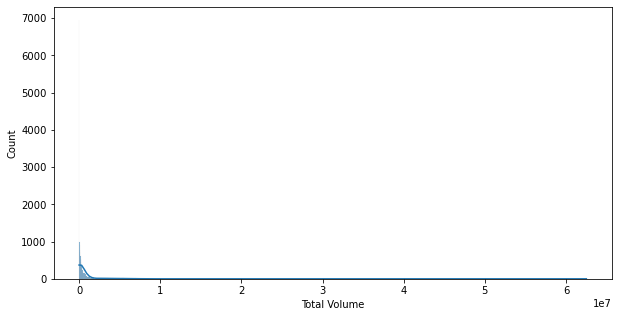

In [93]:
hist_plt(1)

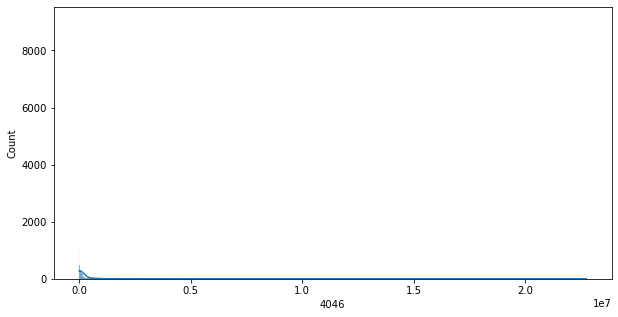

In [94]:
hist_plt(2)

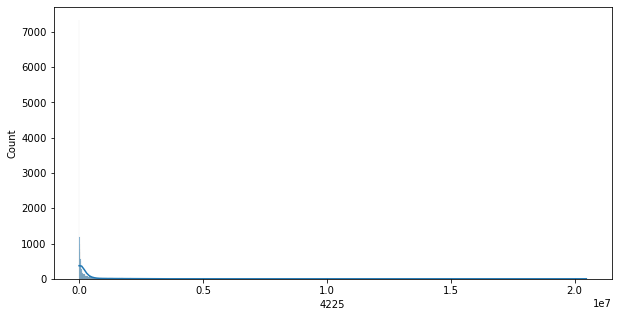

In [95]:
hist_plt(3)

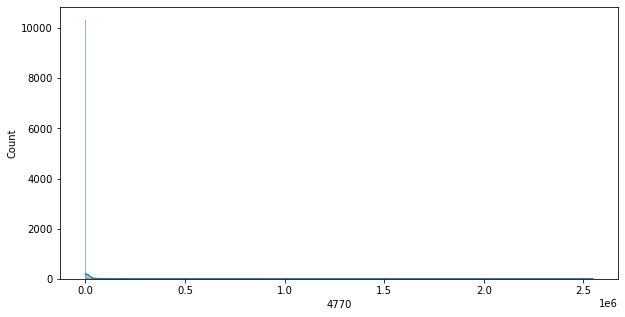

In [96]:
hist_plt(4)

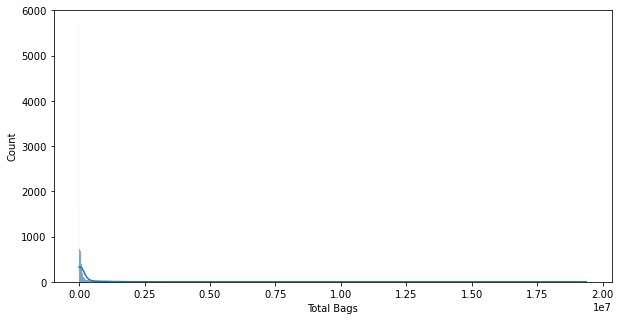

In [97]:
hist_plt(5)

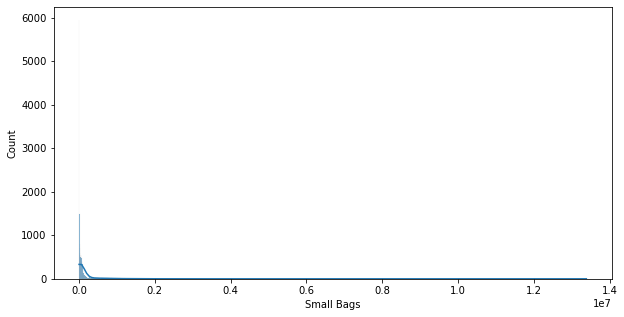

In [98]:
hist_plt(6)

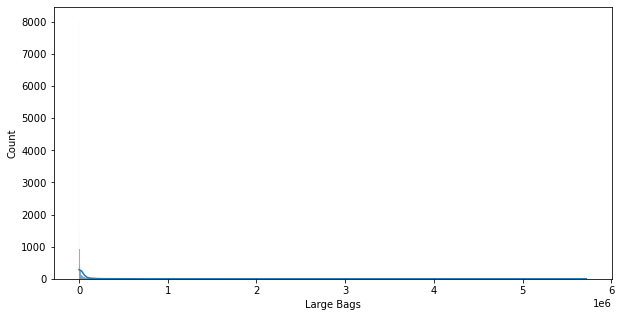

In [99]:
hist_plt(7)

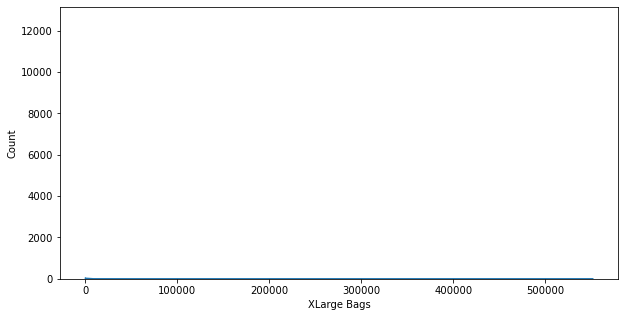

In [100]:
hist_plt(8)

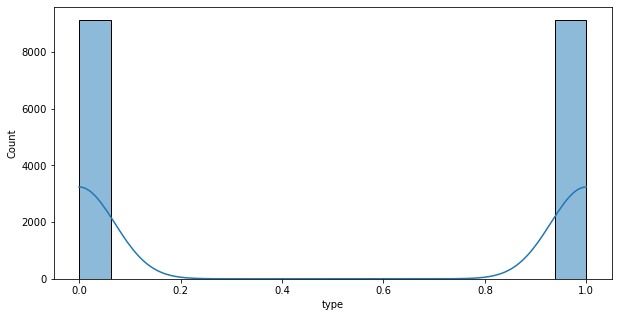

In [101]:
hist_plt(9)

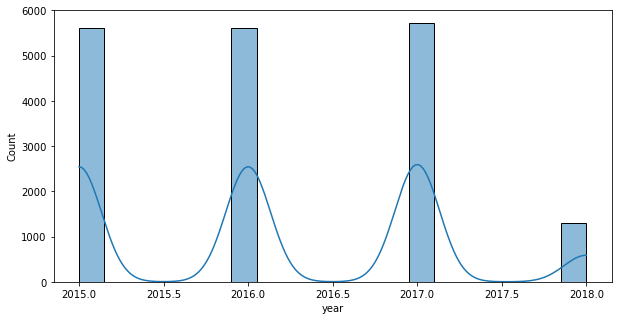

In [102]:
hist_plt(10)

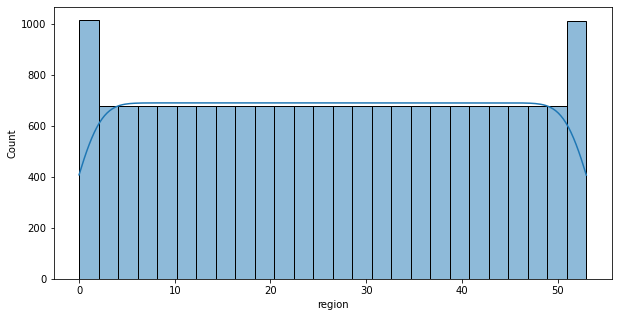

In [103]:
hist_plt(11)

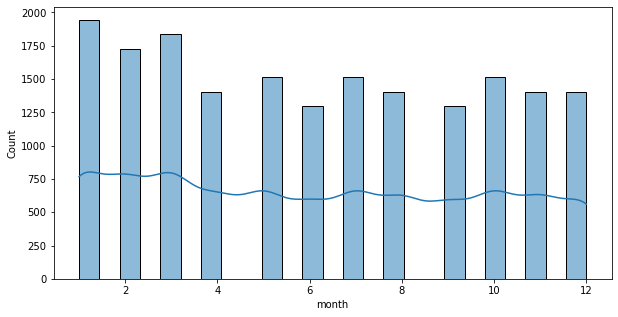

In [104]:
hist_plt(12)

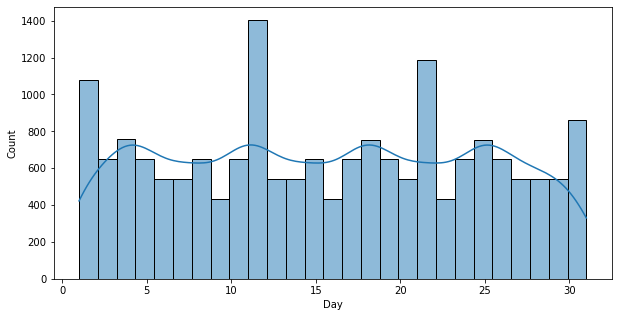

In [105]:
hist_plt(13)

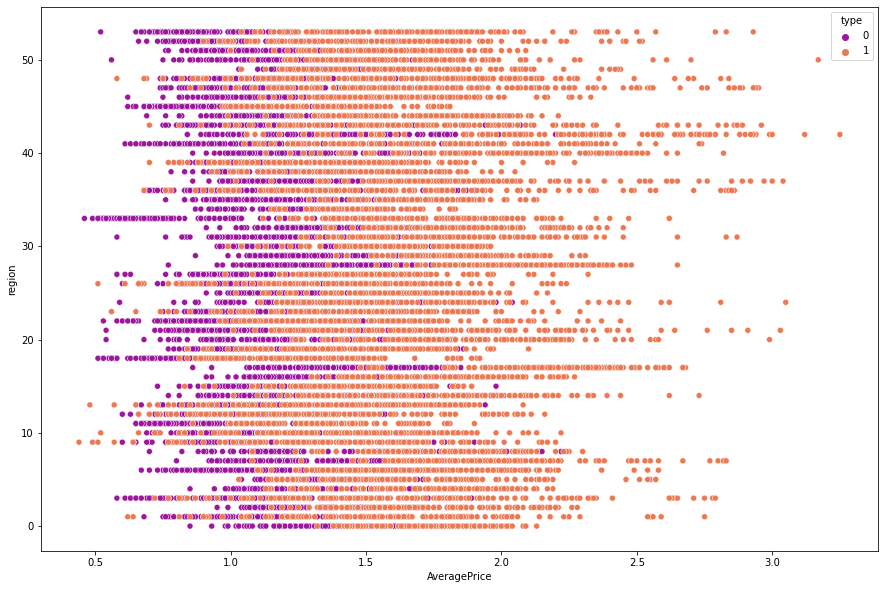

In [182]:
plt.figure(figsize=(15,10))
sns.scatterplot(x='AveragePrice', y='region', hue='type', data=df, palette="plasma")
plt.show()

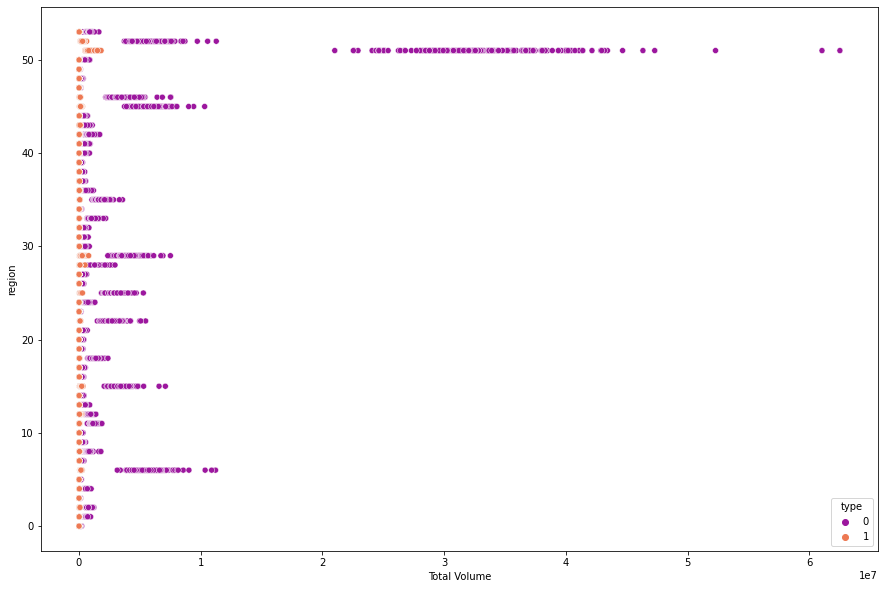

In [184]:
plt.figure(figsize=(15,10))
sns.scatterplot(x='Total Volume', y='region', hue='type', data=df, palette="plasma")
plt.show()

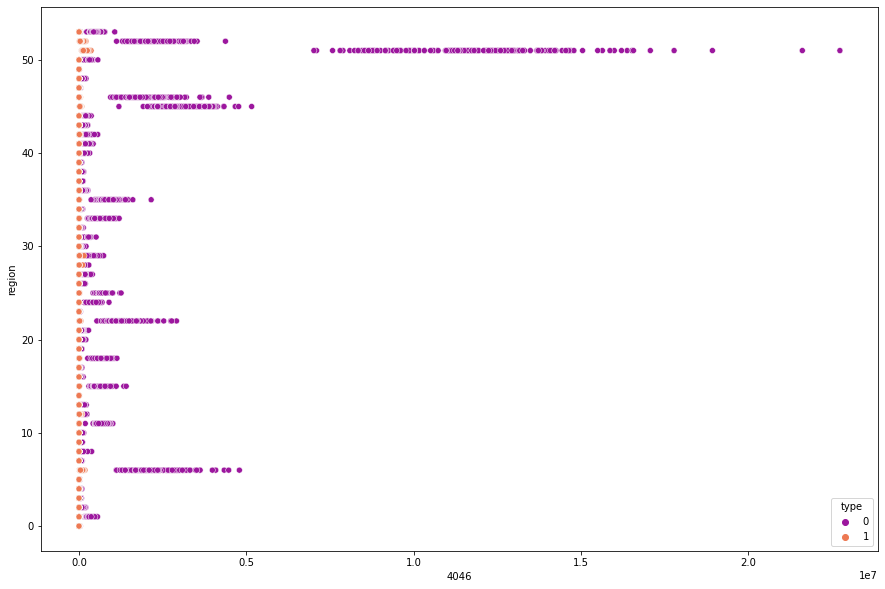

In [185]:
plt.figure(figsize=(15,10))
sns.scatterplot(x='4046', y='region', hue='type', data=df, palette="plasma")
plt.show()

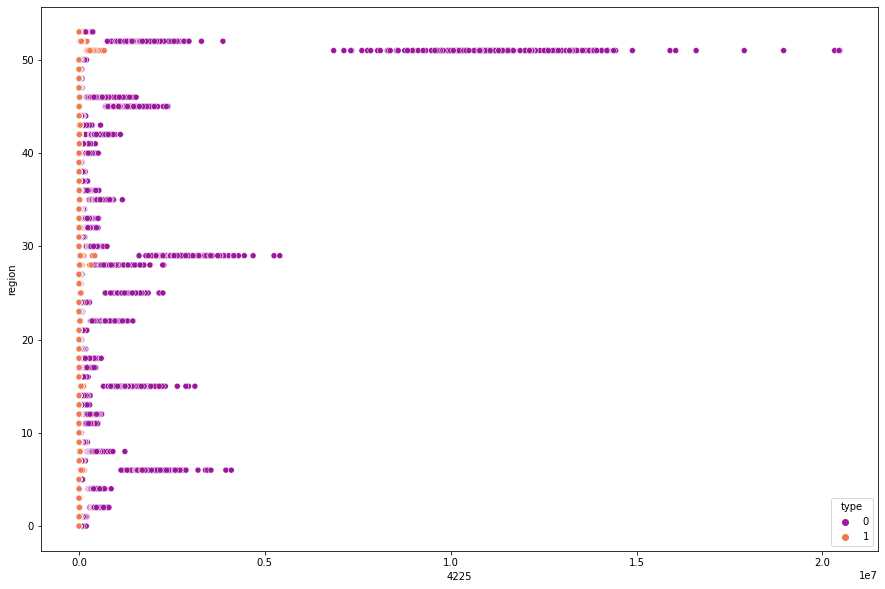

In [186]:
plt.figure(figsize=(15,10))
sns.scatterplot(x='4225', y='region', hue='type', data=df, palette="plasma")
plt.show()

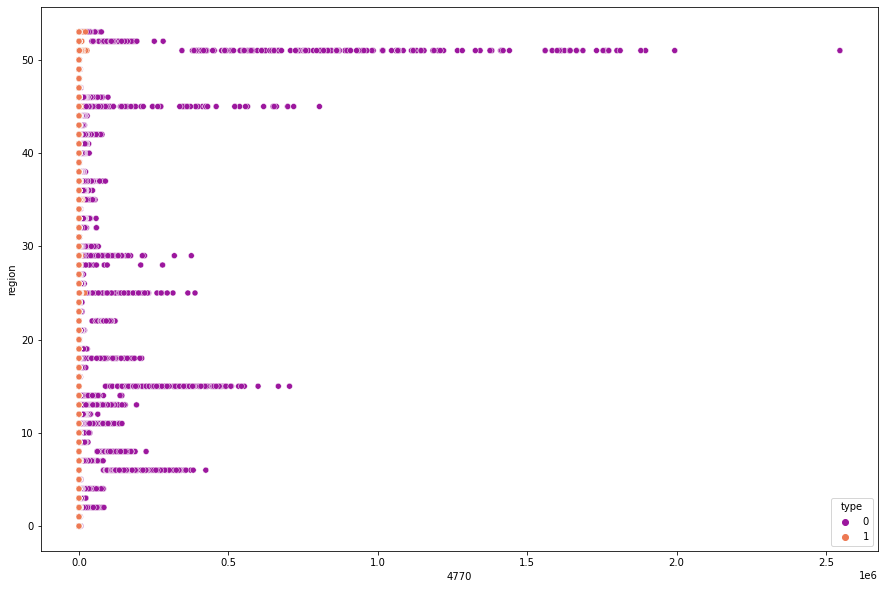

In [187]:
plt.figure(figsize=(15,10))
sns.scatterplot(x='4770', y='region', hue='type', data=df, palette="plasma")
plt.show()

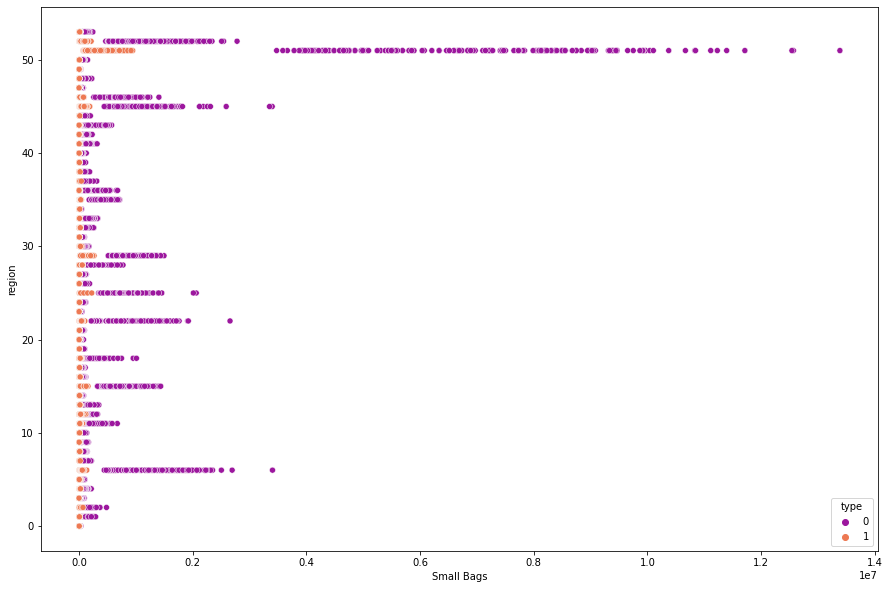

In [188]:
plt.figure(figsize=(15,10))
sns.scatterplot(x='Small Bags', y='region', hue='type', data=df, palette="plasma")
plt.show()

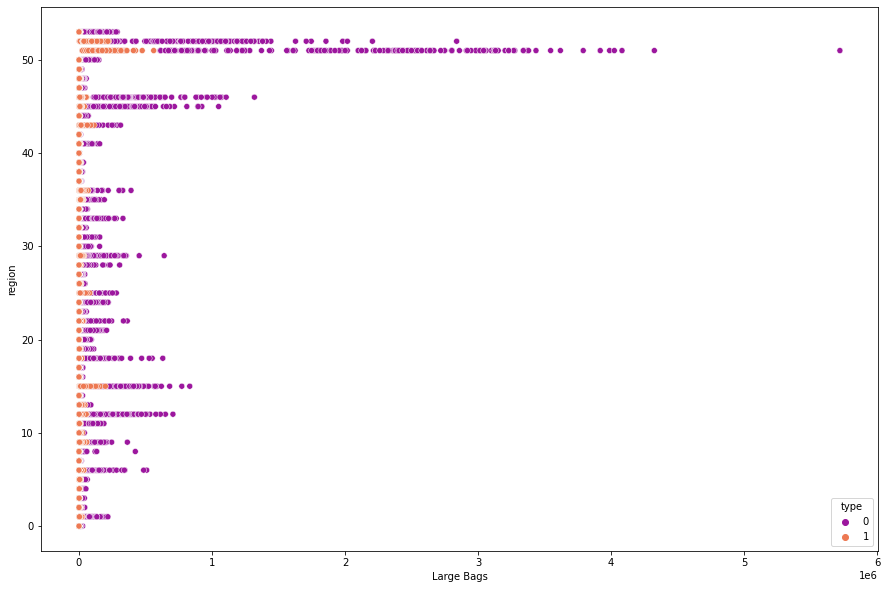

In [189]:
plt.figure(figsize=(15,10))
sns.scatterplot(x='Large Bags', y='region', hue='type', data=df, palette="plasma")
plt.show()

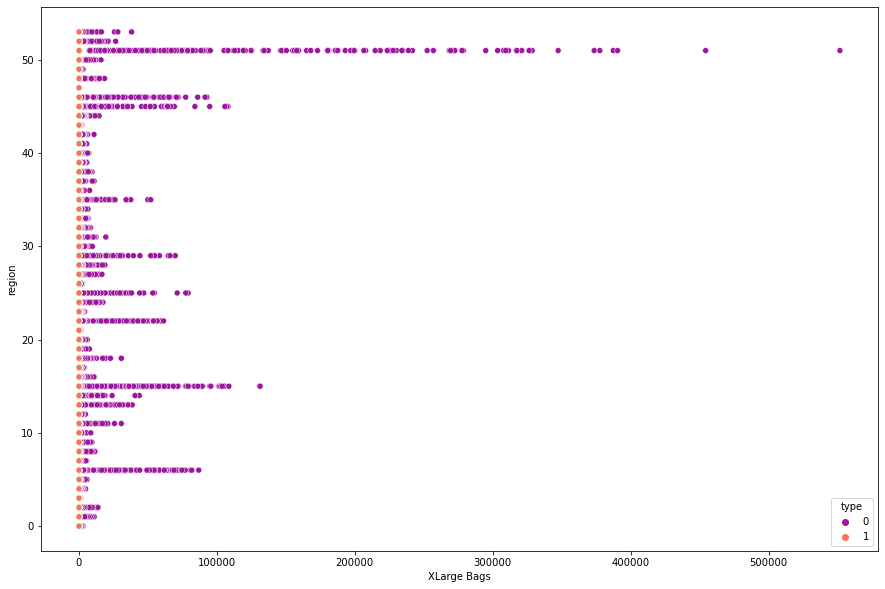

In [190]:
plt.figure(figsize=(15,10))
sns.scatterplot(x='XLarge Bags', y='region', hue='type', data=df, palette="plasma")
plt.show()

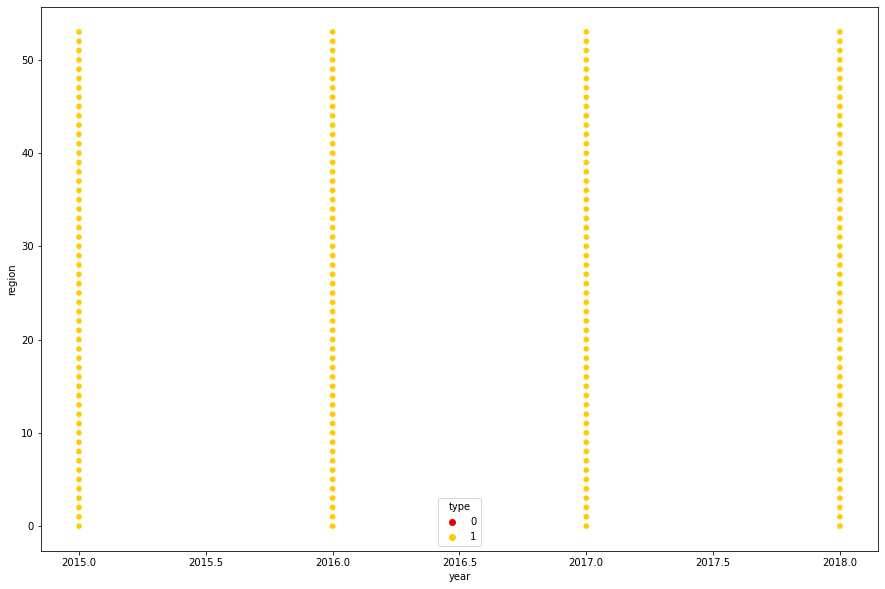

In [195]:
plt.figure(figsize=(15,10))
sns.scatterplot(x='year', y='region', hue='type', data=df, palette="hot")
plt.show()

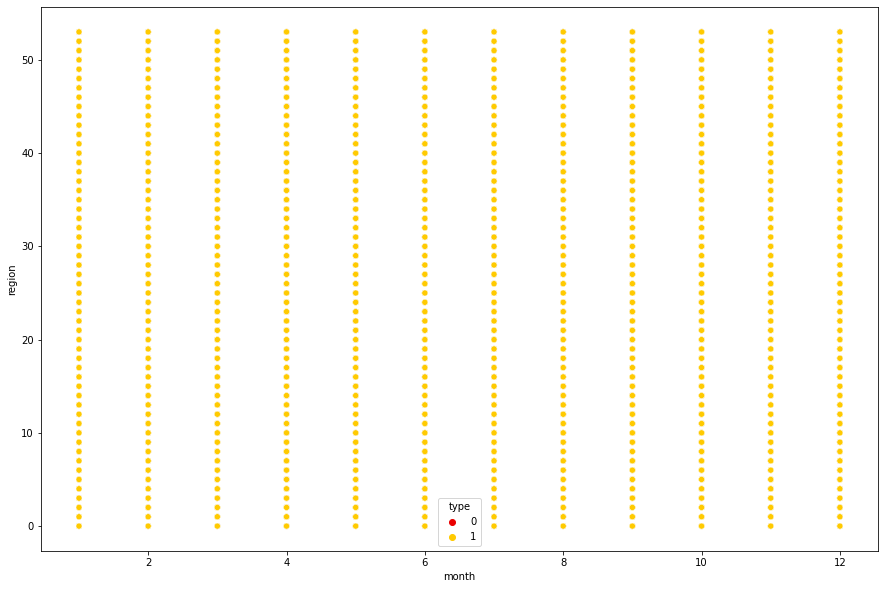

In [196]:
plt.figure(figsize=(15,10))
sns.scatterplot(x='month', y='region', hue='type', data=df, palette="hot")
plt.show()

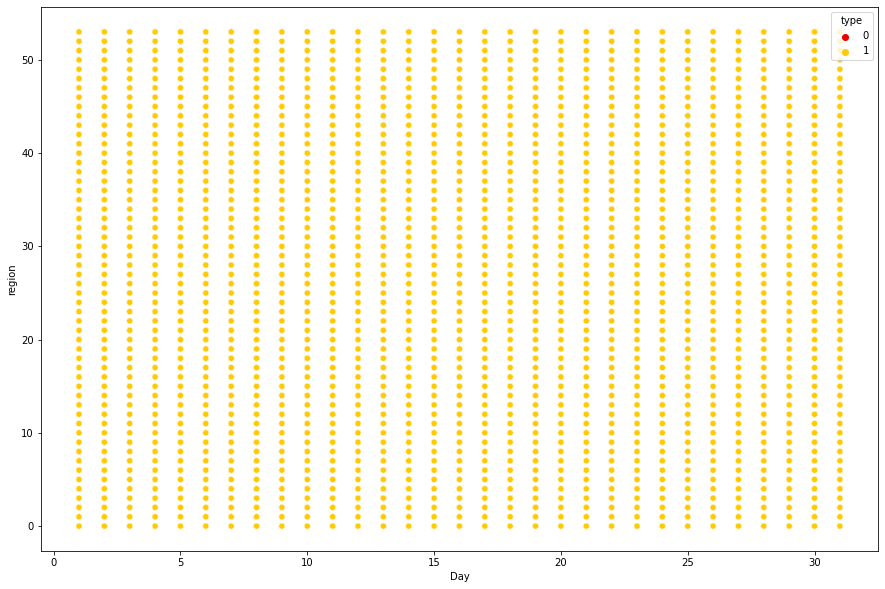

In [197]:
plt.figure(figsize=(15,10))
sns.scatterplot(x='Day', y='region', hue='type', data=df, palette="hot")
plt.show()

In [125]:
def pplot(i):
    plt.figure(figsize=(10,9))
    sns.regplot(x=columns[i],y='region',data=df)    
    plt.xlabel(columns[i])
    plt.show()

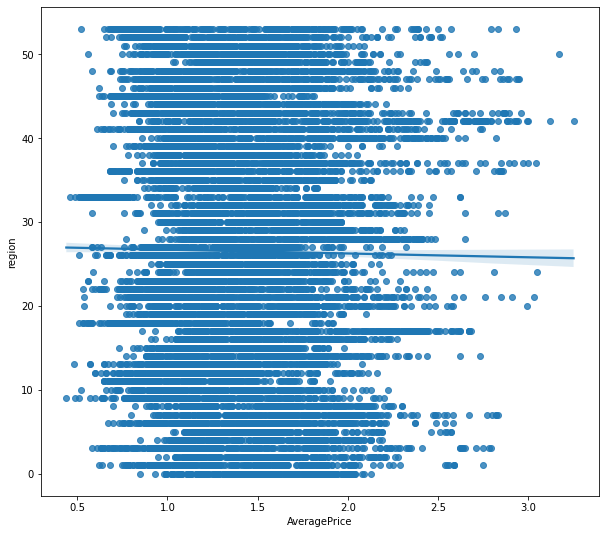

In [128]:
pplot(0)

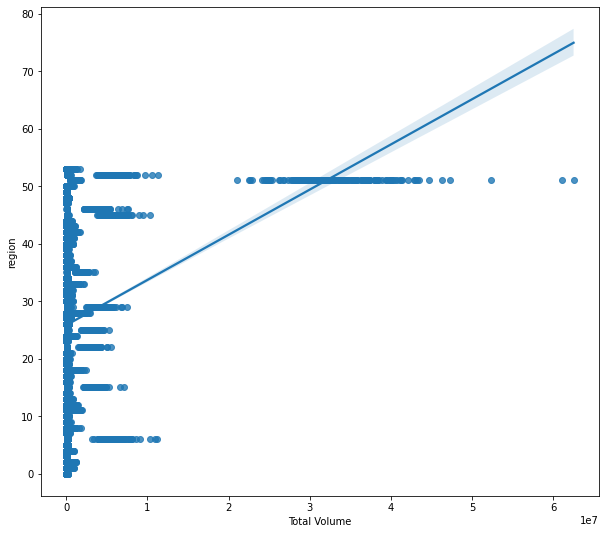

In [127]:
pplot(1)

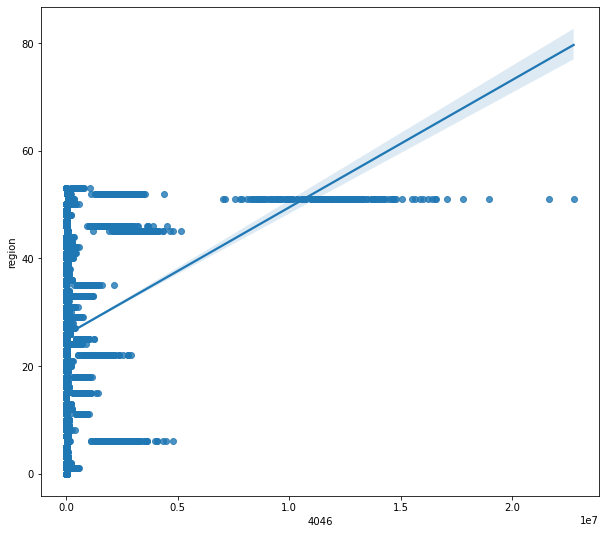

In [129]:
pplot(2)

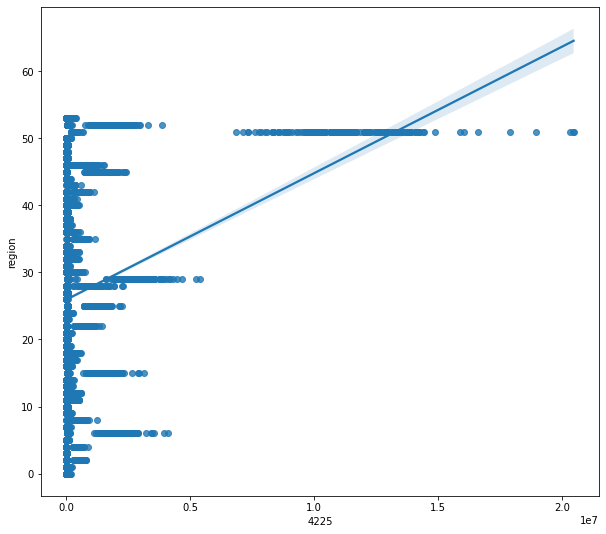

In [130]:
pplot(3)

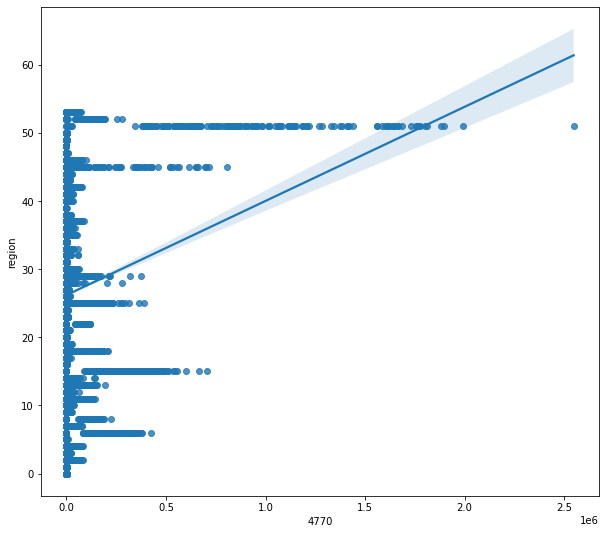

In [131]:
pplot(4)

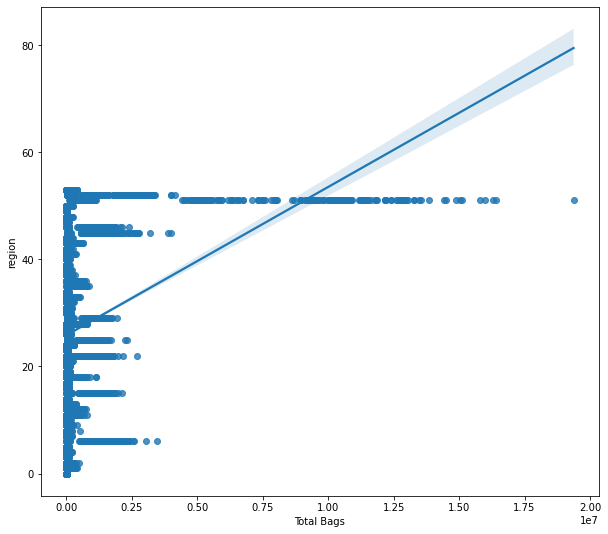

In [132]:
pplot(5)

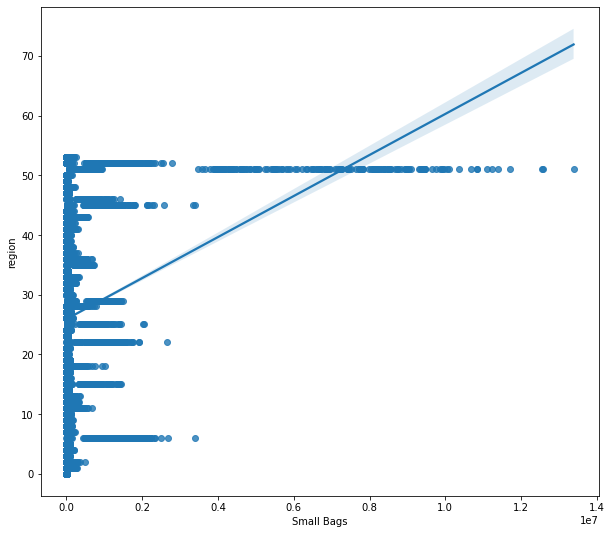

In [133]:
pplot(6)

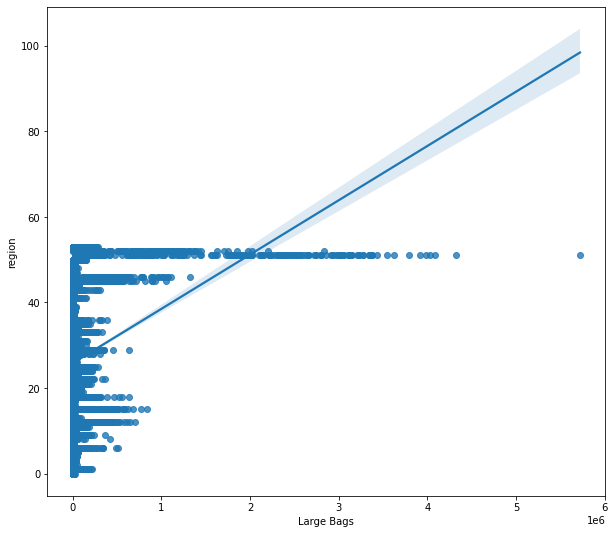

In [134]:
pplot(7)

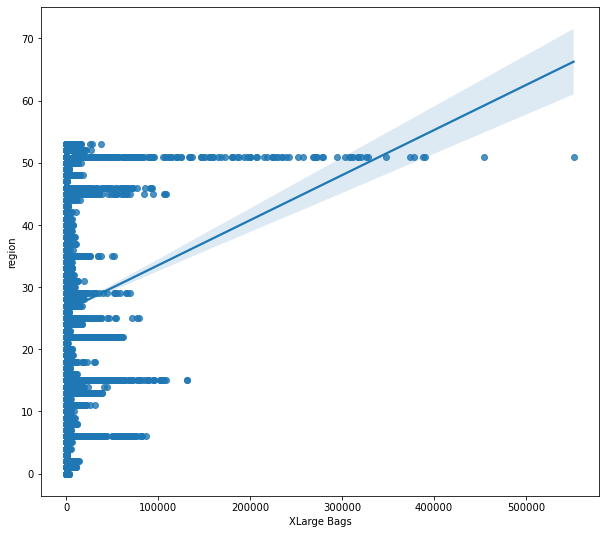

In [135]:
pplot(8)

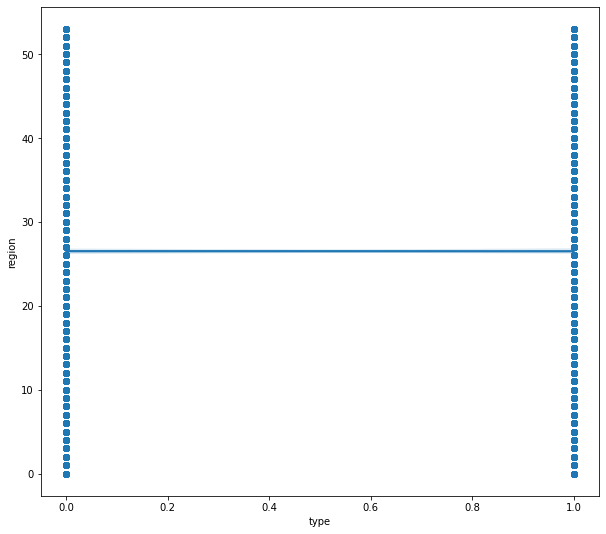

In [136]:
pplot(9)

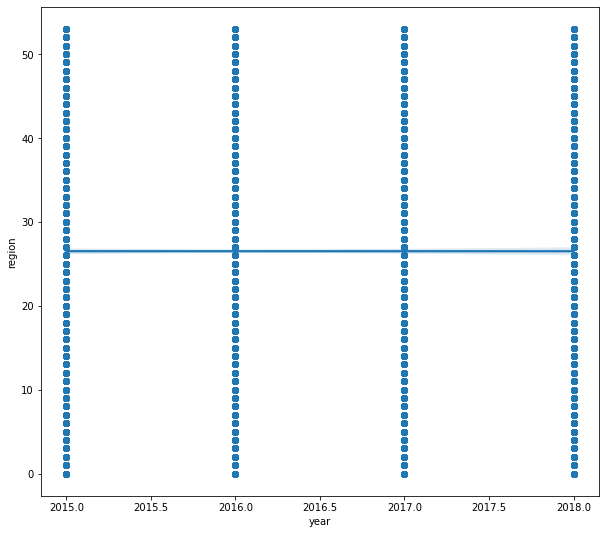

In [137]:
pplot(10)

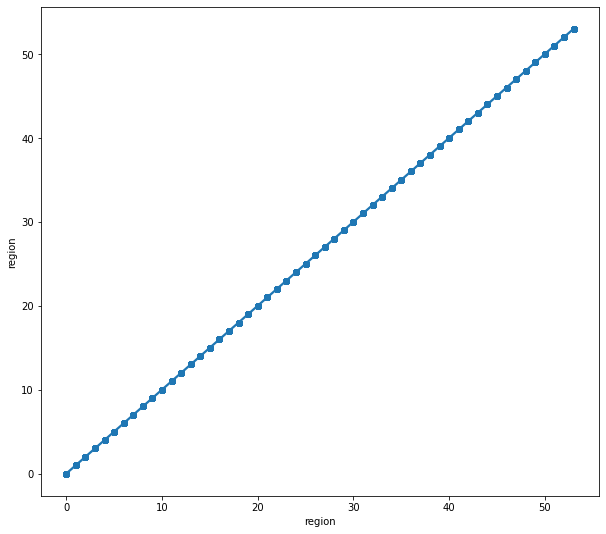

In [138]:
pplot(11)

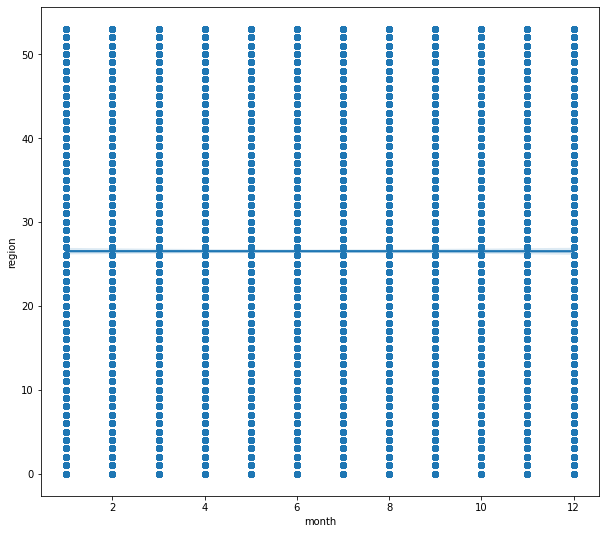

In [139]:
pplot(12)

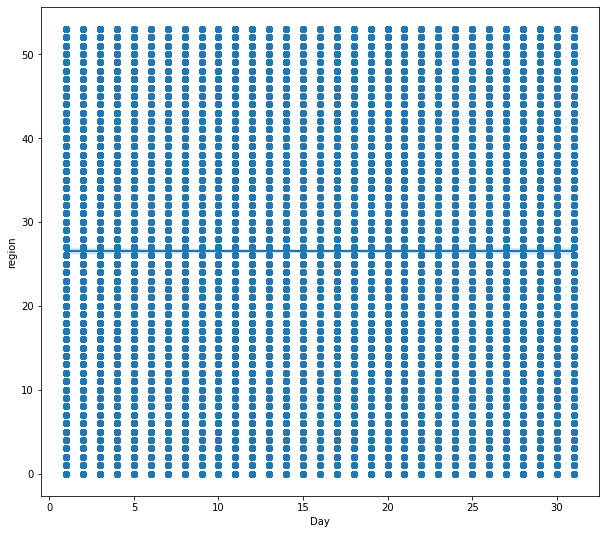

In [140]:
pplot(13)

0    9126
1    9123
Name: type, dtype: int64


<AxesSubplot:xlabel='type', ylabel='count'>

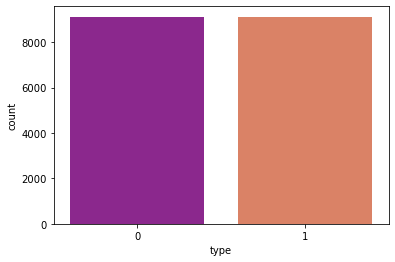

In [156]:
print(df['type'].value_counts())
sns.countplot(x='type',data=df,palette='plasma')

2017    5722
2016    5616
2015    5615
2018    1296
Name: year, dtype: int64


<AxesSubplot:xlabel='year', ylabel='count'>

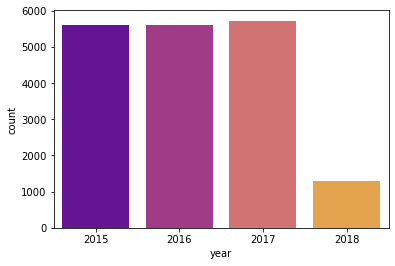

In [178]:
print(df['year'].value_counts())
sns.countplot(x='year',data=df,palette='plasma')

1     1944
3     1836
2     1728
10    1512
7     1512
5     1512
11    1404
8     1404
4     1404
12    1403
9     1296
6     1294
Name: month, dtype: int64


<AxesSubplot:xlabel='month', ylabel='count'>

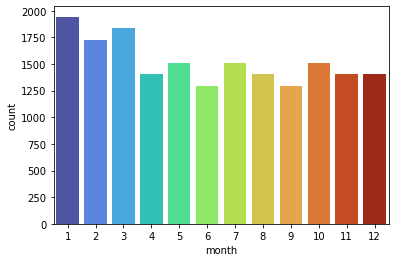

In [162]:
print(df['month'].value_counts())
sns.countplot(x='month',data=df,palette='turbo')

In [167]:
df.columns

Index(['AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags',
       'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year', 'region',
       'month', 'Day'],
      dtype='object')

4     756
11    756
18    755
25    755
1     648
26    648
5     648
12    648
3     648
8     648
15    648
22    648
24    648
17    648
10    648
19    648
7     540
14    540
21    540
28    540
27    540
20    540
29    540
13    540
6     539
2     432
9     432
23    432
30    432
31    432
16    432
Name: Day, dtype: int64


<AxesSubplot:xlabel='Day', ylabel='count'>

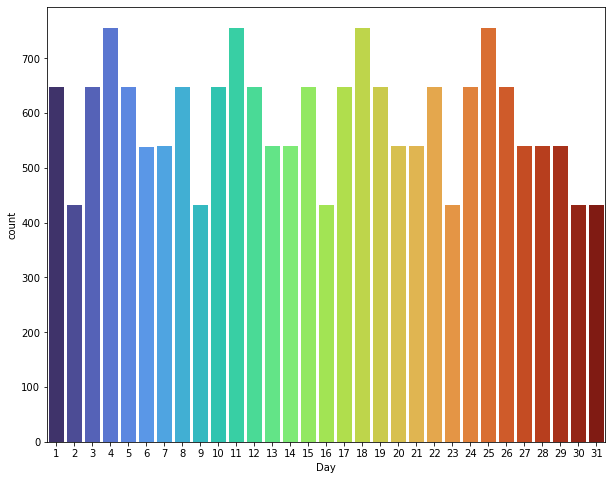

In [168]:
print(df['Day'].value_counts())
plt.figure(figsize=(10,8))
sns.countplot(x='Day',data=df,palette='turbo')

<Figure size 1080x720 with 0 Axes>

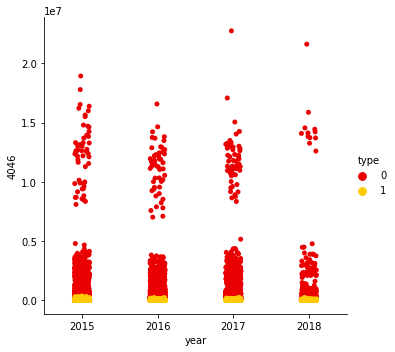

In [174]:
plt.figure(figsize=(15,10))
sns.catplot(x="year", y="4046", hue="type", data=df, palette="hot")
plt.show()

<Figure size 1080x720 with 0 Axes>

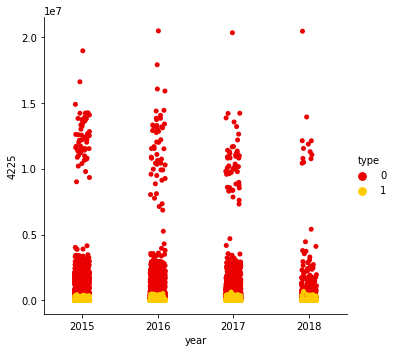

In [175]:
plt.figure(figsize=(15,10))
sns.catplot(x="year", y="4225", hue="type", data=df, palette="hot")
plt.show()

<Figure size 1080x720 with 0 Axes>

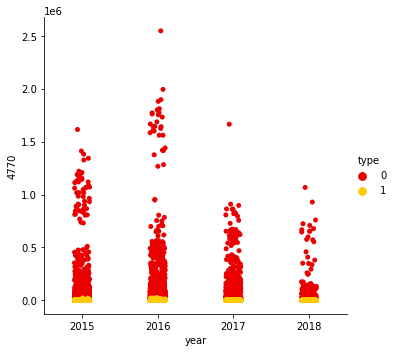

In [176]:
plt.figure(figsize=(15,10))
sns.catplot(x="year", y="4770", hue="type", data=df, palette="hot")
plt.show()

<Figure size 1080x720 with 0 Axes>

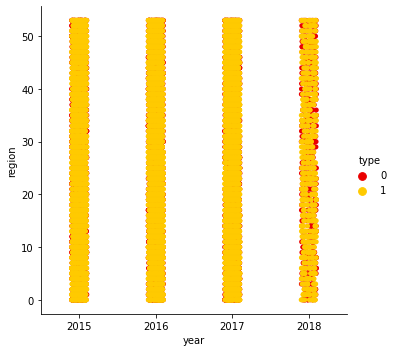

In [177]:
plt.figure(figsize=(15,10))
sns.catplot(x="year", y="region", hue="type", data=df, palette="hot")
plt.show()

<Figure size 1080x720 with 0 Axes>

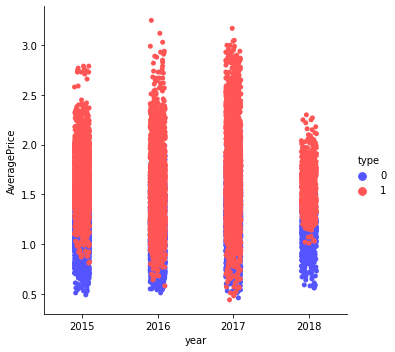

In [169]:
plt.figure(figsize=(15,10))
sns.catplot(x="year", y="AveragePrice", hue="type", data=df, palette="seismic")
plt.show()

with the help of this catplot we can see that how organic Average price more than conventional year after year

<Figure size 1080x720 with 0 Axes>

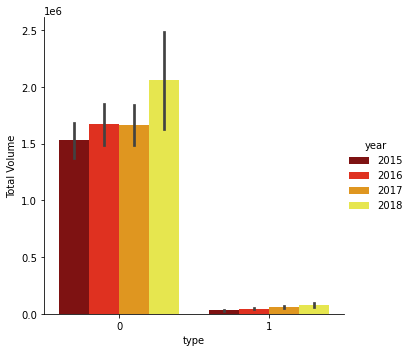

In [170]:
plt.figure(figsize=(15,10))
sns.catplot(x="type", y="Total Volume", hue="year", kind="bar", data=df, palette="hot")
plt.show()

<Figure size 1080x720 with 0 Axes>

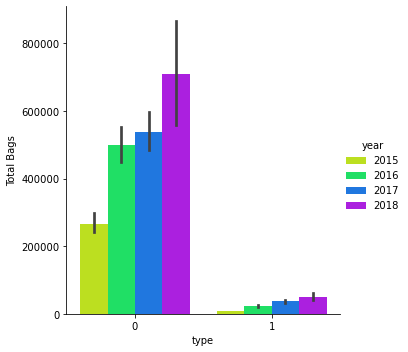

In [171]:
plt.figure(figsize=(15,10))
sns.catplot(x="type", y="Total Bags", hue="year", data=df, kind="bar", palette="hsv")
plt.show()

In [142]:
def dtp(a):
    plt.figure()
    sns.distplot(df[columns[a]],color='green',bins=8)

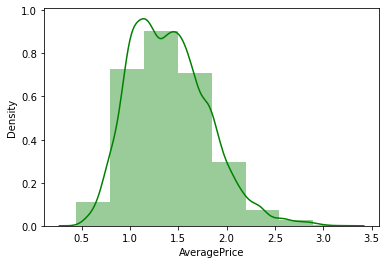

In [143]:
dtp(0)

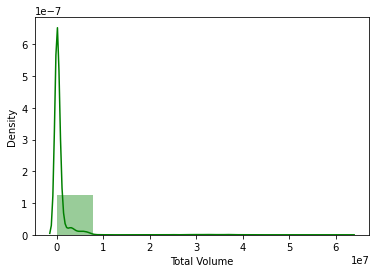

In [144]:
dtp(1)

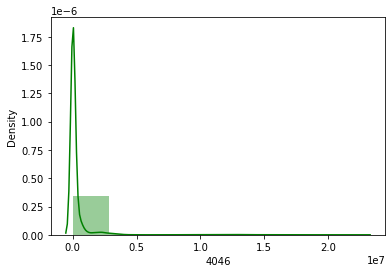

In [145]:
dtp(2)

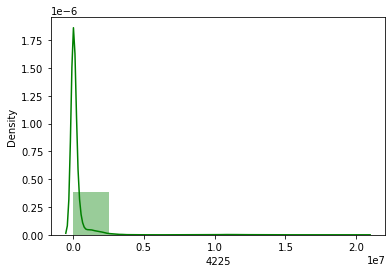

In [146]:
dtp(3)

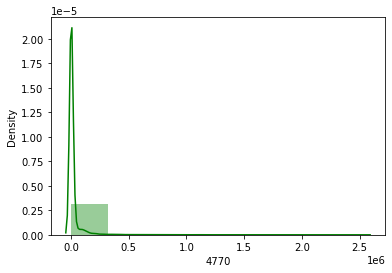

In [147]:
dtp(4)

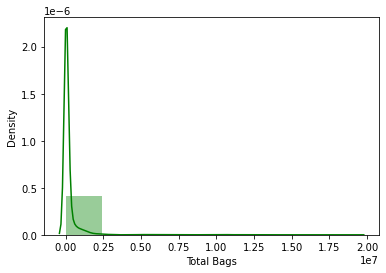

In [148]:
dtp(5)

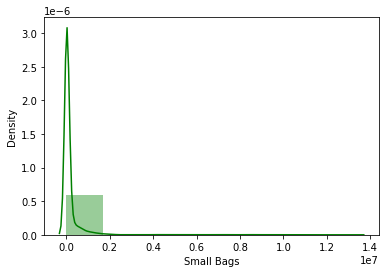

In [149]:
dtp(6)

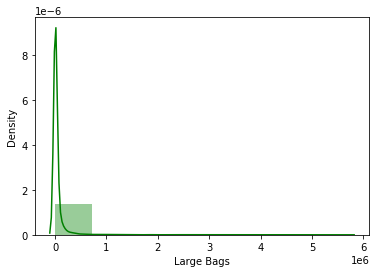

In [150]:
dtp(7)

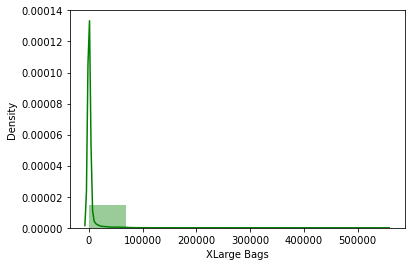

In [151]:
dtp(8)

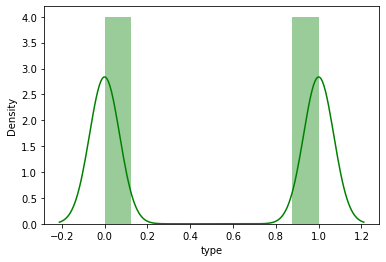

In [152]:
dtp(9)

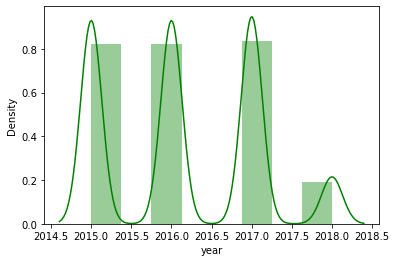

In [153]:
dtp(10)

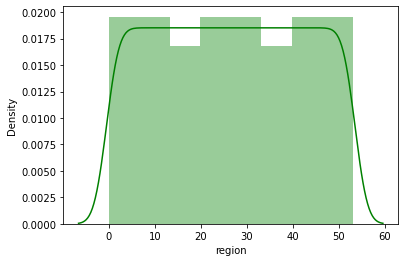

In [154]:
dtp(11)

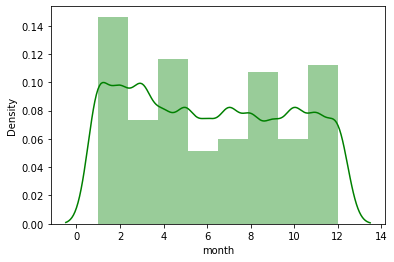

In [155]:
dtp(12)

<Figure size 4320x2160 with 0 Axes>

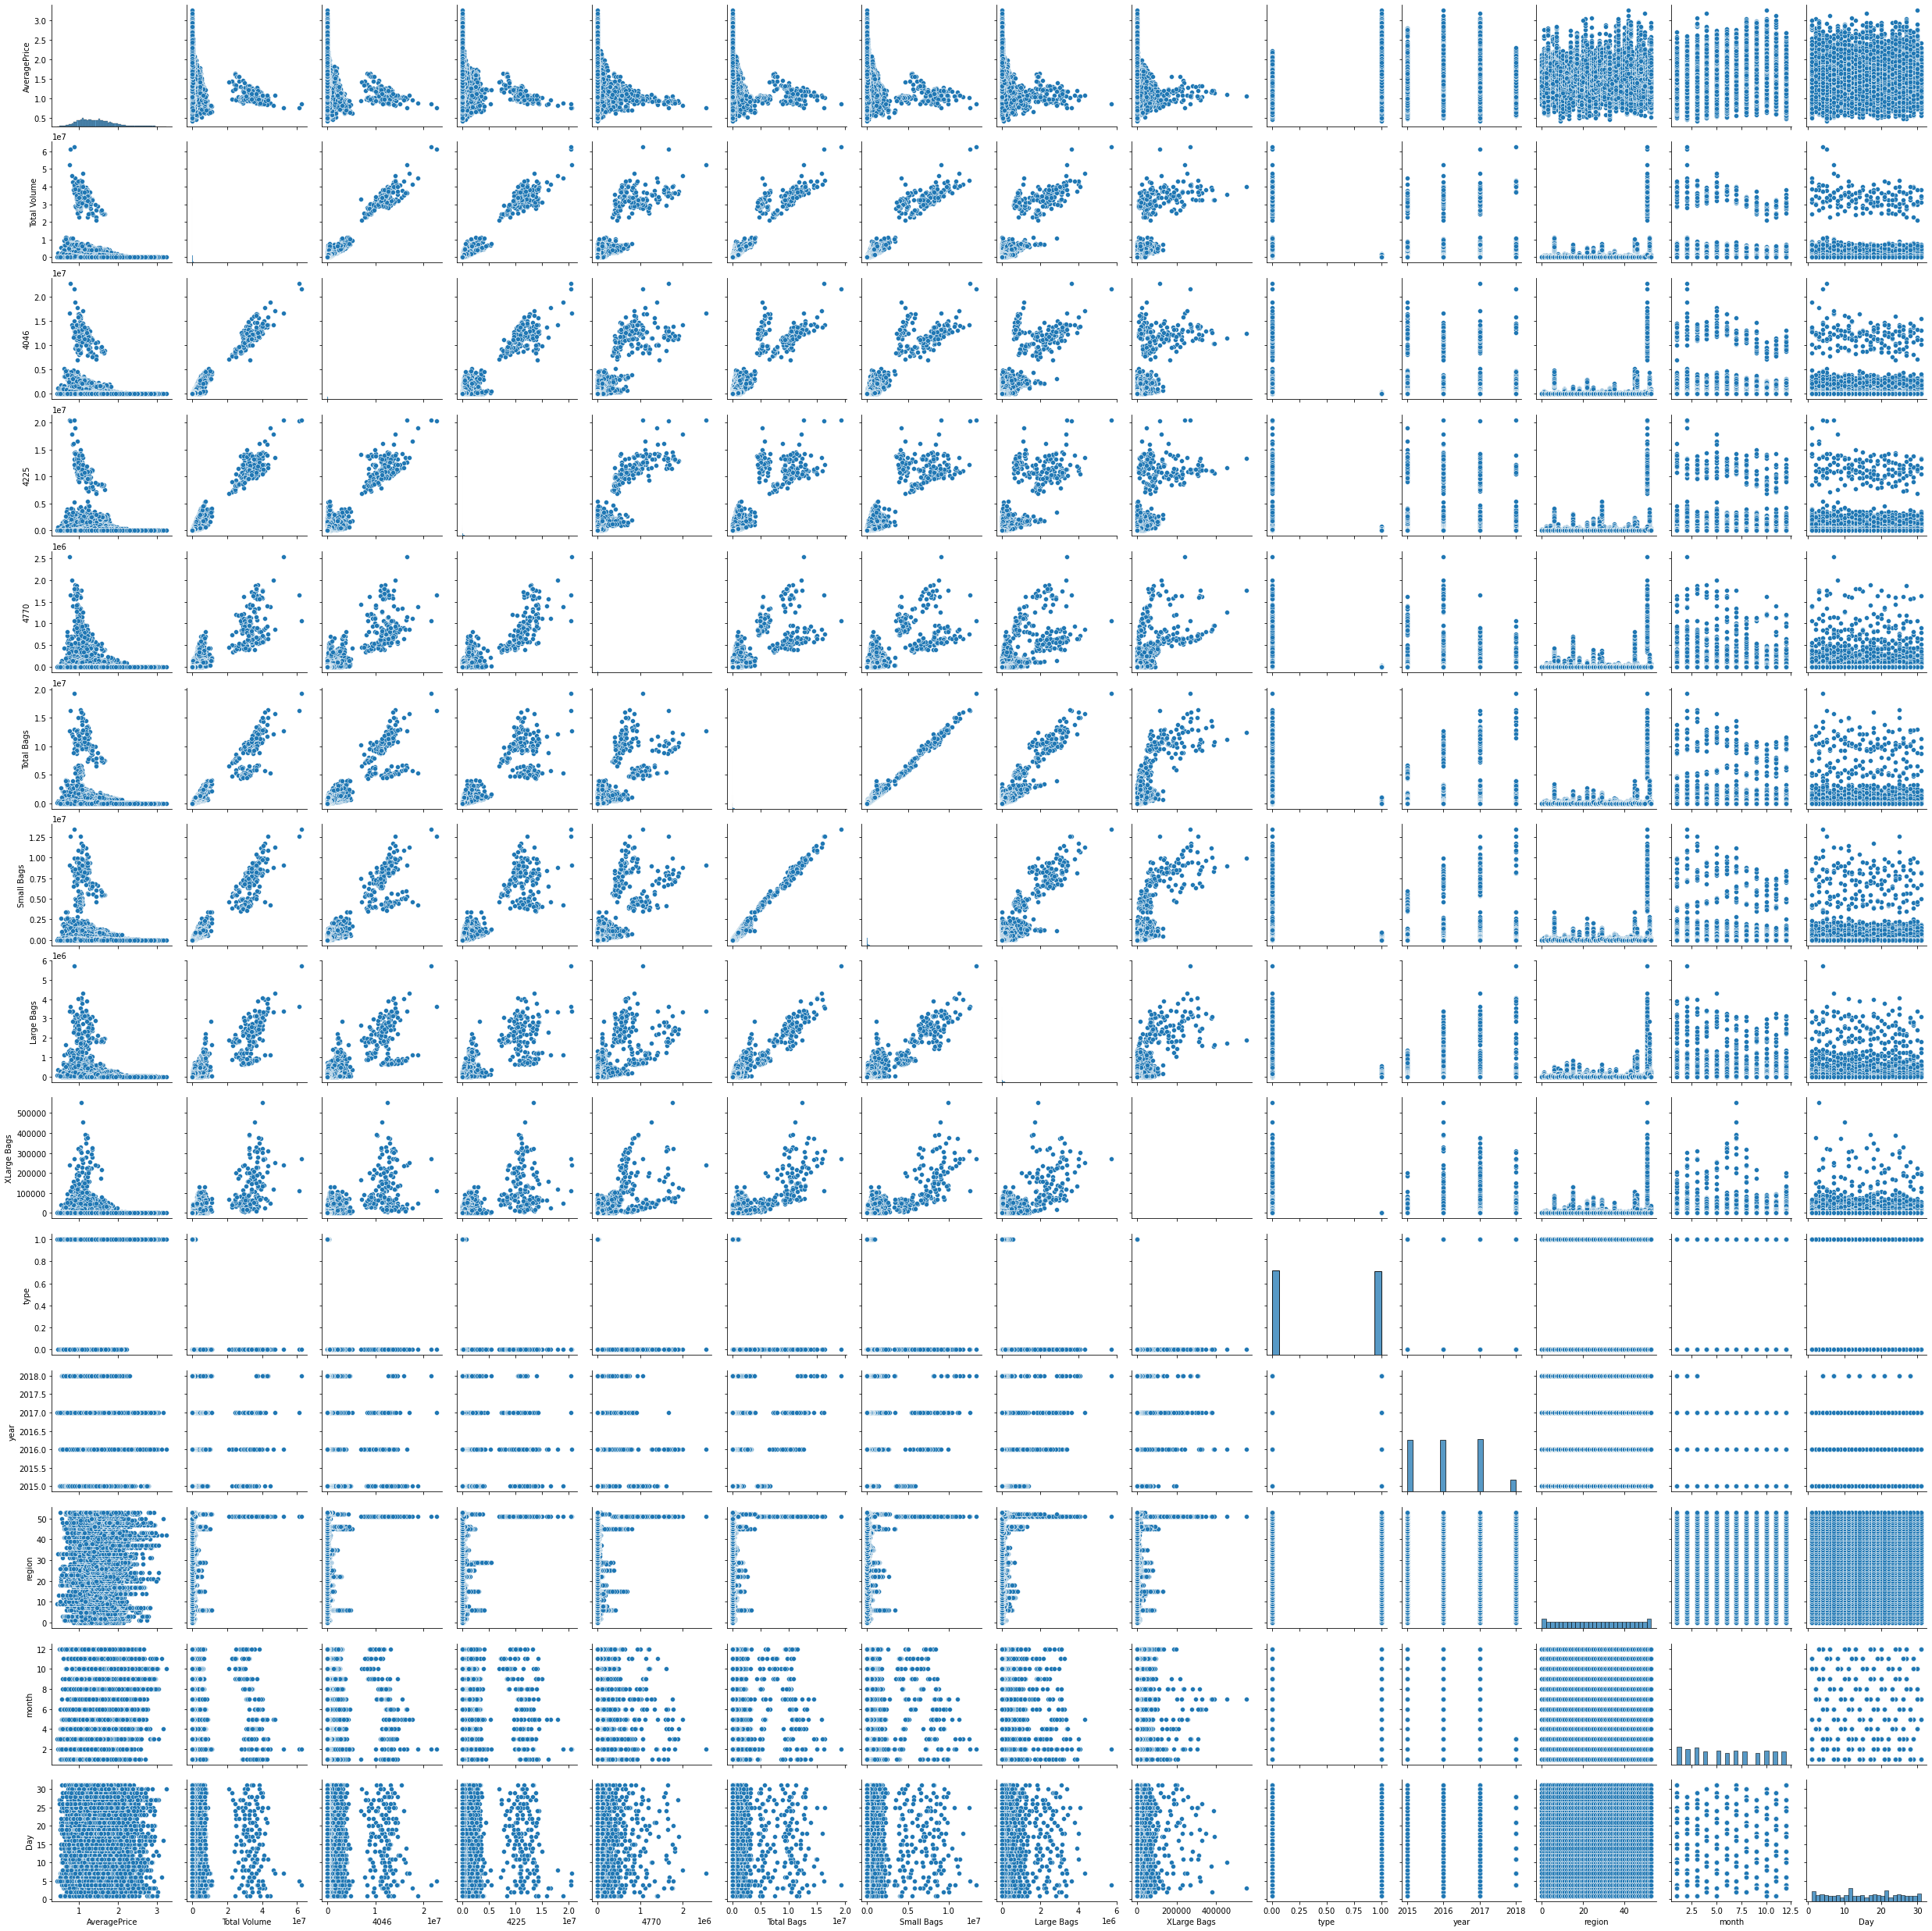

In [141]:
plt.figure(figsize=(60,30))
sns.pairplot(df)

<AxesSubplot:>

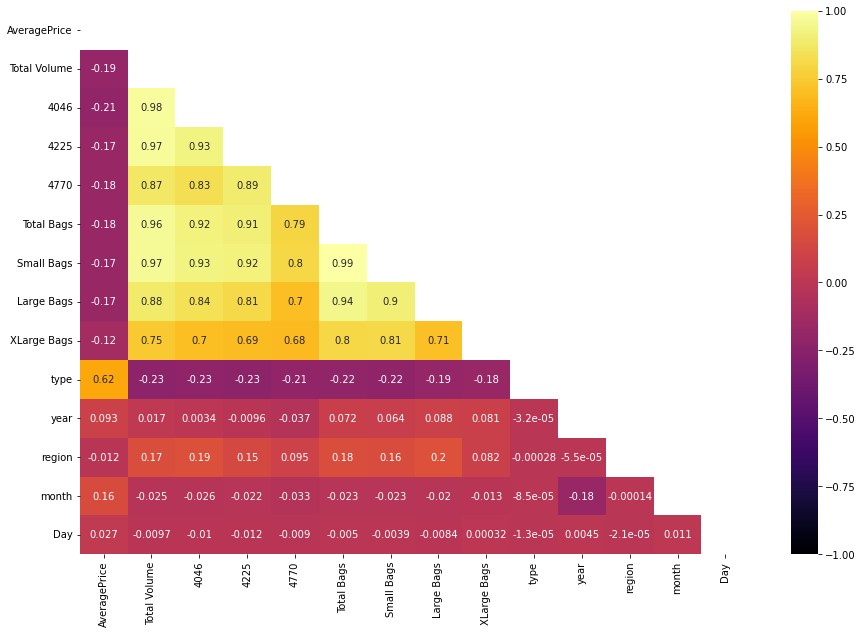

In [194]:
upper_triangle = np.triu(df.corr())
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True,cmap="inferno", mask=upper_triangle)